<h1> Processing the scrapped images </h1>
    
It is the continuation of dataset preparation task started in 
    
https://github.com/shashigharti/python-examples-for-beginners/blob/master/notebooks/plant-nutrient-deficiency/scrapping-plant-images-with-nutrient-deficiency.ipynb
    
References:
    
https://docs.opencv.org/trunk/df/d9d/tutorial_py_colorspaces.html
https://www.kaggle.com/sanikamal/image-segmentation-using-color-spaces

In [11]:
import cv2
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
# Resizing Images
def image_resize(src_dir, dest_dir, inter = cv2.INTER_AREA):
    files = [os.path.join(src_dir, f) for f in os.listdir(src_dir)] 
    width = 100
    height = 100
    
    for file in files:
        file_name = file.split('/')[3]
        dim = (width, height)
        image = Image.open(file)
        
        # resize the image
        resized_img = image.resize(dim)
        resized_img.save(dest_dir + '/' + file_name)
        
image_resize('data/images/train', 'data/images/train_resized')

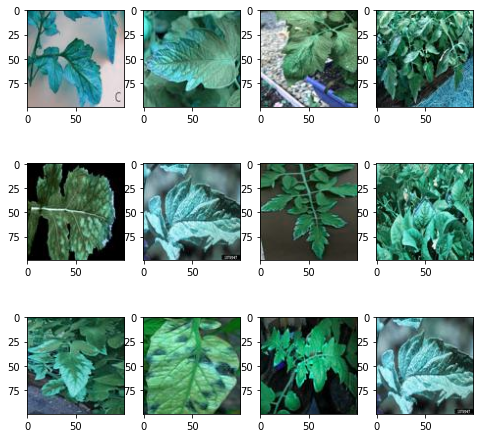

In [3]:
# load and display images
resized_dir = 'data/images/train_resized'
i = 1
fig=plt.figure(figsize=(8, 8))
for file in os.listdir(resized_dir)[:12]:
    #img = np.random.randint(10, size=dim)
    img= cv2.imread(resized_dir + '/' + file)
    fig.add_subplot(3, 4, i)
    plt.imshow(img)
    i += 1
plt.show()


In [4]:
def image_segmentation_by_color(file):
    tomato_leaf = cv2.imread(file)
    tomato_leaf_rgb = cv2.cvtColor(tomato_leaf, cv2.COLOR_BGR2RGB)
    tomato_leaf_hsv = cv2.cvtColor(tomato_leaf_rgb, cv2.COLOR_RGB2HSV)
    
    # range for green color in HSV color space
    lower = np.array([25, 50, 20])
    upper = np.array([80, 255, 255])

    # threshold to get green color
    mask = cv2.inRange(tomato_leaf_hsv, lower, upper)

    # Bitwise-AND mask and original image
    result = cv2.bitwise_and(tomato_leaf_rgb, tomato_leaf_rgb, mask= mask)

    # blur image to improve segmentation
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    
    return mask, blur

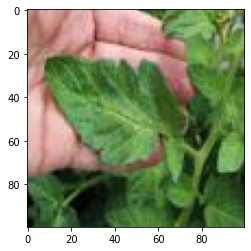

In [5]:
img = 'data/images/train_resized/000010.jpg'
tomato_leaf = cv2.imread(img)
tomato_leaf_rgb = cv2.cvtColor(tomato_leaf, cv2.COLOR_BGR2RGB)
plt.imshow(tomato_leaf_rgb)
plt.show()

In [6]:
# Pixel Colors
pixel_colors = tomato_leaf_rgb.reshape((np.shape(tomato_leaf_rgb)[0]*np.shape(tomato_leaf_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

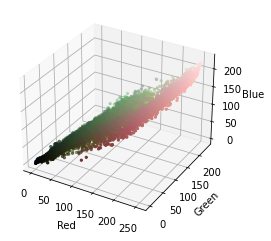

In [7]:
# RGB Colorspace
r, g, b = cv2.split(tomato_leaf_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

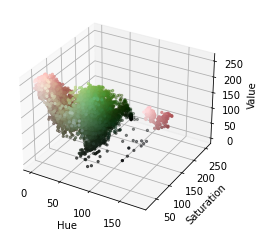

In [8]:
# HSV Colorspace
tomato_leaf_hsv = cv2.cvtColor(tomato_leaf_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(tomato_leaf_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

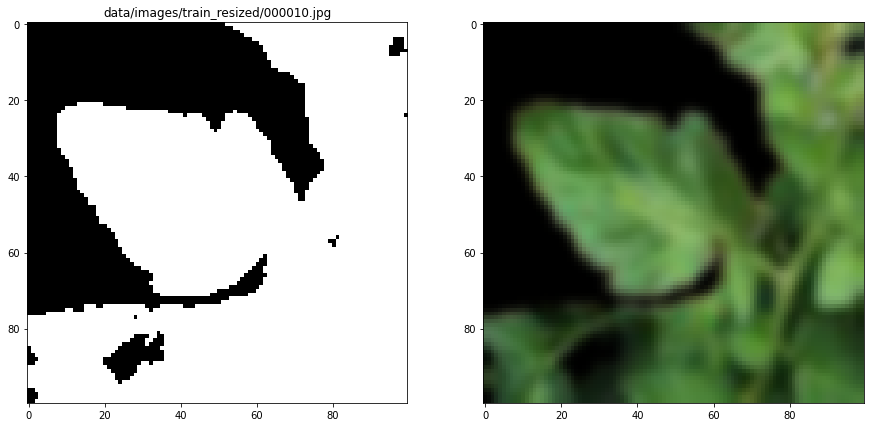

In [9]:
mask, result_img = image_segmentation_by_color(img)
plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.title(img)
plt.imshow(mask, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(result_img)
plt.show()

In [10]:
# Segment all images in train_resized folder and overwrite with new segmented image

dest = 'data/images/train_resized'
train_dir = 'data/images/train_resized'
for file in os.listdir(train_dir):    
    _, result_image = image_segmentation_by_color(train_dir + '/' + file)
    cv2.imwrite(dest + '/' + file, cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR))